## Data Wrangling

In [22]:
import seaborn as sns
import pandas as pd
df=sns.load_dataset('titanic')
from sklearn.preprocessing import LabelEncoder


In [23]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest

In [24]:
import pandas as pd
import numpy as np

In [25]:
df['age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: age, Length: 891, dtype: bool

In [26]:
imputer=SimpleImputer(strategy='mean')
df['age']=imputer.fit_transform(df[['age']])

In [27]:
df.drop(columns=['deck'],inplace=True)

In [28]:
df['fare']=df['fare'].fillna(df['fare'].mean())
import matplotlib.pyplot as plt

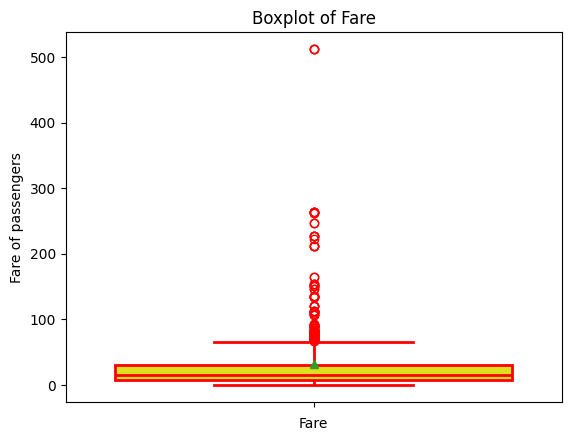

In [8]:
# outliers detection in fare
sns.boxplot(df['fare'],showmeans=True,linecolor='red',color='yellow',linewidth=2)
plt.ylabel('Fare of passengers')
plt.xlabel('Fare')
plt.title('Boxplot of Fare')
plt.show()

In [9]:
# removal of outliers thorough z-score
df['fare']=df['fare'][df['fare']<35]

In [10]:
#  Outlier Detection and Removal
# Detect and remove outliers in 'fare' based on the Interquartile Range (IQR)
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)]


In [32]:
# Normalization
# Normalize 'fare' to have values between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
df['fare'] = scalar.fit_transform(df[['fare']])

In [12]:
# show maximum columns in the dataset
# Set the maximum number of columns to display
pd.set_option('display.max_columns')  # Set to 2 for example


ValueError: Must provide an even number of non-keyword arguments

In [39]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group,family_size,sex_encoded
0,0,3,male,-0.592481,1,0,0.014151,S,Third,man,True,Southampton,no,False,adult,2,1
1,1,1,female,0.638789,1,0,0.139136,C,First,woman,False,Cherbourg,yes,False,middle,2,0
2,1,3,female,-0.284663,0,0,0.015469,S,Third,woman,False,Southampton,yes,True,adult,1,0
3,1,1,female,0.407926,1,0,0.103644,S,First,woman,False,Southampton,yes,False,middle,2,0
4,0,3,male,0.407926,0,0,0.015713,S,Third,man,True,Southampton,no,True,middle,1,1


In [30]:
# Standardization
# Standardize 'age' to have a mean of 0 and a standard deviation of 1
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['age']=scaler.fit_transform(df[['age']])



In [34]:
# dicretization of age 
df['age_group']=pd.cut(df['age'],bins=5,labels=['young','adult','middle','old','very old'])

In [36]:
# Feature enginering
# create a new feature 'family_size' by adding 'sibsp' and 'parch'
df['family_size']=df['sibsp']+df['parch']+1


In [20]:
# drop columns deck
df.drop(columns=['deck'],axis=1,inplace=True)

KeyError: "['deck'] not found in axis"

In [49]:
# one hot encoding
df = pd.get_dummies(df, drop_first=True)

In [38]:
# Encoding Categorical Variables
# Convert 'sex' into a numerical format using Label Encoding
label_encoder = LabelEncoder()
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])

In [43]:
# Convert 'embarked' into binary columns using One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder
#from sklearn.model_selection import train_test_split
one_hot_encoder = OneHotEncoder()
encoded_embarked = one_hot_encoder.fit_transform(df[['embarked']])
#embarked_columns = one_hot_encoder.get_feature_names_out(['embarked'])
#df = df.join(pd.DataFrame(encoded_embarked, columns=embarked_columns))

# Data Splitting
# Split the data into training and testing sets
X = df[['pclass', 'sex_encoded', 'age_group', 'sibsp', 'parch', 'fare', 'family_size']]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)